<a href="https://colab.research.google.com/github/vaishnavimalkar/-fabric-pattern-classifier/blob/main/model_cnn_h5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

# Open a file upload dialog
uploaded = files.upload()


Saving archive.zip to archive.zip


In [2]:
import zipfile
import os

# Specify the ZIP file name
zip_file = 'archive.zip'

# Unzip it into a folder named 'archive'
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall('archive')

# List the files inside the unzipped 'archive' folder
os.listdir('archive')


['data_pattern']

In [3]:

def read_data(folder="archive"):
    labels = []
    paths = []

    for label_name in os.listdir(folder):
        label_path = os.path.join(folder, label_name)
        if os.path.isdir(label_path):
            for image_file in os.listdir(label_path):
                image_path = os.path.join(label_path, image_file)
                labels.append(label_name)
                paths.append(image_path)

    return labels, paths


In [5]:
all_labels, all_paths = read_data("archive")



In [6]:
import pandas as pd

df = pd.DataFrame({
    'path': all_paths,
    'label': all_labels
})


In [8]:
from sklearn.model_selection import train_test_split


In [12]:
train_df, dummy_df = train_test_split(
    df,
    train_size=0.8,
    random_state=123,
    shuffle=True,
    stratify=df['label']
)

# Second split: Validation (10%), Test (10%) from the dummy set
valid_df, test_df = train_test_split(
    dummy_df,
    train_size=0.5,
    random_state=123,
    shuffle=True,
    stratify=dummy_df["label"]
)

# Print dataset sizes
print("Train dataset:", len(train_df))
print("Validation dataset:", len(valid_df))
print("Test dataset:", len(test_df))
train_balance = train_df['label'].value_counts()
print(train_balance)
# Show class balance in training set
print("\nTrain dataset value count:\n", train_df['label'].value_counts())

Train dataset: 8
Validation dataset: 1
Test dataset: 1
label
data_pattern    8
Name: count, dtype: int64

Train dataset value count:
 label
data_pattern    8
Name: count, dtype: int64


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Sample input (assuming you already created this DataFrame earlier)
df = pd.DataFrame({
    'path': all_paths,
    'label': all_labels
})

# First split: 80% training, 20% temp (val + test)
train_df, dummy_df = train_test_split(
    df,
    train_size=0.8,
    random_state=123,
    shuffle=True
)

# Second split: 10% validation, 10% test
valid_df, test_df = train_test_split(
    dummy_df,
    train_size=0.5,
    random_state=123,
    shuffle=True
)

# Output sizes
print("Train dataset:", len(train_df))
print("Validation dataset:", len(valid_df))
print("Test dataset:", len(test_df))

# Show label count (won’t vary in your case)
print("\nTrain dataset value count:\n", train_df['label'].value_counts())



Train dataset: 8
Validation dataset: 1
Test dataset: 1

Train dataset value count:
 label
data_pattern    8
Name: count, dtype: int64


In [14]:
df = pd.DataFrame({
    'path': all_paths,
    'label': all_labels
})


In [15]:
train_df['filename'] = train_df['path'].apply(os.path.basename)
valid_df['filename'] = valid_df['path'].apply(os.path.basename)
test_df['filename'] = test_df['path'].apply(os.path.basename)


In [25]:
directory = '/content/archive'


In [26]:
if os.path.exists(directory):
    labels = os.listdir(directory)
    print("Labels:", labels)
else:
    print("Directory not found!")


Labels: ['data_pattern']


In [27]:
# Print summary
print("Train set size:", len(train_df))
print("Validation set size:", len(valid_df))
print("Test set size:", len(test_df))

# Print filenames
print("\n🔹 Train filenames:")
print(train_df['filename'].tolist())

print("\n🔹 Validation filenames:")
print(valid_df['filename'].tolist())

print("\n🔹 Test filenames:")
print(test_df['filename'].tolist())


Train set size: 8
Validation set size: 1
Test set size: 1

🔹 Train filenames:
['polka dot', 'ikat', 'cartoon', 'tribal', 'animal', 'geometry', 'stripes', 'squares']

🔹 Validation filenames:
['plain']

🔹 Test filenames:
['floral']


In [28]:
labels.sort()

In [30]:
import cv2
import numpy as np

In [31]:
import numpy as np
import cv2

def apply_transform(image):
    # Rotate (random angle between -40 and 40 degrees)
    angle = np.random.uniform(-40, 40)
    rows, cols = image.shape[:2]
    M = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)
    image = cv2.warpAffine(image, M, (cols, rows))

    # Horizontal Flip
    if np.random.rand() < 0.5:
        image = cv2.flip(image, 1)

    # Vertical Flip
    if np.random.rand() < 0.5:
        image = cv2.flip(image, 0)

    # Random Brightness and Contrast
    alpha = 1.8 + np.random.uniform(-0.2, 0.2)  # Contrast control
    beta = 0.0 + np.random.uniform(-20, 20)     # Brightness control
    image = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

    # Random Gamma Correction
    gamma = np.random.uniform(0.8, 1.2)
    image = np.clip((image / 255.0) ** gamma, 0, 1) * 255.0
    image = image.astype(np.uint8)

    return image


In [32]:
import cv2

def apply_augmentation(image_path, label):
    # Read the image
    image = cv2.imread(image_path)
    if image is None:
        raise FileNotFoundError(f"Image not found at path: {image_path}")

    # Convert from BGR to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Apply augmentation
    augmented_image = apply_transform(image)

    return augmented_image, label


In [35]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator



In [36]:
gen=ImageDataGenerator()

In [50]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 1. Create a data generator instance with rescaling
gen = ImageDataGenerator(rescale=1./255)

# 2. Train generator
train_gen = gen.flow_from_dataframe(
    dataframe=train_df,
    x_col='path',
    y_col='label',
    target_size=(255, 255),
    seed=123,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=True,
    batch_size=32
)

# 3. Validation generator
valid_gen = gen.flow_from_dataframe(
    dataframe=valid_df,
    x_col='path',
    y_col='label',
    target_size=(255, 255),
    seed=123,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=False,
    batch_size=32
)

# 4. Test generator
test_gen = gen.flow_from_dataframe(
    dataframe=test_df,
    x_col='path',
    y_col='label',
    target_size=(255, 255),
    seed=123,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=False,
    batch_size=32
)


Found 0 validated image filenames belonging to 0 classes.
Found 0 validated image filenames belonging to 0 classes.
Found 0 validated image filenames belonging to 0 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 8 invalid image filename(s) in x_col="path". These filename(s) will be ignored.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 1 invalid image filename(s) in x_col="path". These filename(s) will be ignored.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 1 invalid image filename(s) in x_col="path". These filename(s) will be ignored.
  warnings.warn(


In [51]:
print("🔎 Sample train paths:\n", train_df['path'].head(), "\n")
print("🔎 Sample valid paths:\n", valid_df['path'].head(), "\n")
print("🔎 Sample test paths:\n", test_df['path'].head(), "\n")


🔎 Sample train paths:
 7    archive/data_pattern/polka dot
5         archive/data_pattern/ikat
8      archive/data_pattern/cartoon
3       archive/data_pattern/tribal
1       archive/data_pattern/animal
Name: path, dtype: object 

🔎 Sample valid paths:
 4    archive/data_pattern/plain
Name: path, dtype: object 

🔎 Sample test paths:
 0    archive/data_pattern/floral
Name: path, dtype: object 



In [52]:
import os
import pandas as pd

def get_image_paths_and_labels(root_folder):
    paths = []
    labels = []

    for label_name in os.listdir(root_folder):
        label_path = os.path.join(root_folder, label_name)
        if os.path.isdir(label_path):
            for img_file in os.listdir(label_path):
                if img_file.lower().endswith(('.jpg', '.jpeg', '.png')):
                    full_path = os.path.join(label_path, img_file)
                    paths.append(full_path)
                    labels.append(label_name)
    return paths, labels

# adjust if your actual image folder is different
root = '/content/archive/data_pattern'

all_paths, all_labels = get_image_paths_and_labels(root)

# final dataframe
df = pd.DataFrame({'path': all_paths, 'label': all_labels})


In [53]:
print(df.head())
print("\n🚨 Any missing files? ", df['path'].apply(os.path.exists).value_counts())


                                           path   label
0  /content/archive/data_pattern/floral/974.jpg  floral
1  /content/archive/data_pattern/floral/687.jpg  floral
2  /content/archive/data_pattern/floral/685.jpg  floral
3  /content/archive/data_pattern/floral/757.jpg  floral
4  /content/archive/data_pattern/floral/884.jpg  floral

🚨 Any missing files?  path
True    4230
Name: count, dtype: int64


In [54]:
from sklearn.model_selection import train_test_split

train_df, dummy_df = train_test_split(df, train_size=0.8, stratify=df['label'], random_state=123)
valid_df, test_df = train_test_split(dummy_df, train_size=0.5, stratify=dummy_df['label'], random_state=123)


In [55]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

gen = ImageDataGenerator(rescale=1./255)

train_gen = gen.flow_from_dataframe(train_df, x_col='path', y_col='label',
                                    target_size=(255, 255), class_mode='categorical',
                                    color_mode='rgb', batch_size=32, shuffle=True, seed=123)

valid_gen = gen.flow_from_dataframe(valid_df, x_col='path', y_col='label',
                                    target_size=(255, 255), class_mode='categorical',
                                    color_mode='rgb', batch_size=32, shuffle=False, seed=123)

test_gen = gen.flow_from_dataframe(test_df, x_col='path', y_col='label',
                                   target_size=(255, 255), class_mode='categorical',
                                   color_mode='rgb', batch_size=32, shuffle=False, seed=123)


Found 3384 validated image filenames belonging to 10 classes.
Found 423 validated image filenames belonging to 10 classes.
Found 423 validated image filenames belonging to 10 classes.


In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam, Adamax
import tensorflow as tf


In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation="relu", input_shape=(255, 255, 3)))
model.add(MaxPooling2D(strides=2, pool_size=2, padding="valid"))

model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation="relu"))
model.add(MaxPooling2D(strides=2, pool_size=2, padding="valid"))
model.add(Dropout(0.5))

model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation="relu"))
model.add(MaxPooling2D(strides=2, pool_size=2, padding="valid"))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))  # Replace 10 with number of classes if different


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [58]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 255, 255, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 127, 127, 32)   │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 32)     │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 30752)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,936,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,946,826 (15.06 MB)

 Trainable params: 3,946,826 (15.06 MB)

 Non-trainable params: 0 (0.00 B)

In [59]:
import tensorflow as tf

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="model_cnn.h5",
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
)


In [60]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


In [61]:
history_cnn = model.fit(
    x=train_gen,
    epochs=40,
    verbose=1,
    validation_data=valid_gen,
    validation_steps=None,
    shuffle=True,
    callbacks=[model_checkpoint_callback]  # note the equals sign and square brackets
)


Epoch 1/40


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1053 - loss: 2.5753

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()



Epoch 1: val_accuracy improved from -inf to 0.14657, saving model to model_cnn.h5


106/106 ━━━━━━━━━━━━━━━━━━━━ 153s 1s/step - accuracy: 0.1054 - loss: 2.5734 - val_accuracy: 0.1466 - val_loss: 2.2758
Epoch 2/40
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1374 - loss: 2.2723
Epoch 2: val_accuracy improved from 0.14657 to 0.17258, saving model to model_cnn.h5


106/106 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.1375 - loss: 2.2722 - val_accuracy: 0.1726 - val_loss: 2.2643
Epoch 3/40
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1733 - loss: 2.2353
Epoch 3: val_accuracy improved from 0.17258 to 0.19149, saving model to model_cnn.h5


106/106 ━━━━━━━━━━━━━━━━━━━━ 139s 1s/step - accuracy: 0.1734 - loss: 2.2353 - val_accuracy: 0.1915 - val_loss: 2.2289
Epoch 4/40
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1953 - loss: 2.2040
Epoch 4: val_accuracy improved from 0.19149 to 0.21040, saving model to model_cnn.h5


106/106 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - accuracy: 0.1953 - loss: 2.2039 - val_accuracy: 0.2104 - val_loss: 2.1908
Epoch 5/40
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2184 - loss: 2.1576
Epoch 5: val_accuracy improved from 0.21040 to 0.22459, saving model to model_cnn.h5


106/106 ━━━━━━━━━━━━━━━━━━━━ 147s 1s/step - accuracy: 0.2182 - loss: 2.1577 - val_accuracy: 0.2246 - val_loss: 2.1910
Epoch 6/40
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2117 - loss: 2.1553
Epoch 6: val_accuracy improved from 0.22459 to 0.24113, saving model to model_cnn.h5


106/106 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - accuracy: 0.2117 - loss: 2.1551 - val_accuracy: 0.2411 - val_loss: 2.1379
Epoch 7/40
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2453 - loss: 2.0885
Epoch 7: val_accuracy improved from 0.24113 to 0.24350, saving model to model_cnn.h5


106/106 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.2453 - loss: 2.0885 - val_accuracy: 0.2435 - val_loss: 2.1258
Epoch 8/40
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2576 - loss: 2.0643
Epoch 8: val_accuracy improved from 0.24350 to 0.26950, saving model to model_cnn.h5


106/106 ━━━━━━━━━━━━━━━━━━━━ 139s 1s/step - accuracy: 0.2576 - loss: 2.0642 - val_accuracy: 0.2695 - val_loss: 2.0777
Epoch 9/40
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2554 - loss: 2.0386
Epoch 9: val_accuracy improved from 0.26950 to 0.27660, saving model to model_cnn.h5


106/106 ━━━━━━━━━━━━━━━━━━━━ 145s 1s/step - accuracy: 0.2554 - loss: 2.0386 - val_accuracy: 0.2766 - val_loss: 2.0522
Epoch 10/40
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2831 - loss: 1.9872
Epoch 10: val_accuracy did not improve from 0.27660
106/106 ━━━━━━━━━━━━━━━━━━━━ 138s 1s/step - accuracy: 0.2832 - loss: 1.9872 - val_accuracy: 0.2742 - val_loss: 2.0580
Epoch 11/40
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2907 - loss: 1.9579
Epoch 11: val_accuracy improved from 0.27660 to 0.29078, saving model to model_cnn.h5


106/106 ━━━━━━━━━━━━━━━━━━━━ 138s 1s/step - accuracy: 0.2907 - loss: 1.9580 - val_accuracy: 0.2908 - val_loss: 2.0158
Epoch 12/40
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3207 - loss: 1.9005
Epoch 12: val_accuracy improved from 0.29078 to 0.31915, saving model to model_cnn.h5


106/106 ━━━━━━━━━━━━━━━━━━━━ 138s 1s/step - accuracy: 0.3206 - loss: 1.9006 - val_accuracy: 0.3191 - val_loss: 1.9812
Epoch 13/40
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3164 - loss: 1.8433
Epoch 13: val_accuracy did not improve from 0.31915
106/106 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.3163 - loss: 1.8435 - val_accuracy: 0.3026 - val_loss: 1.9571
Epoch 14/40
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3377 - loss: 1.8115
Epoch 14: val_accuracy did not improve from 0.31915
106/106 ━━━━━━━━━━━━━━━━━━━━ 145s 1s/step - accuracy: 0.3377 - loss: 1.8117 - val_accuracy: 0.2955 - val_loss: 1.9810
Epoch 15/40
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3313 - loss: 1.8213
Epoch 15: val_accuracy did not improve from 0.31915
106/106 ━━━━━━━━━━━━━━━━━━━━ 139s 1s/step - accuracy: 0.3313 - loss: 1.8213 - val_accuracy: 0.3144 - val_loss: 1.9526
Epoch 16/40
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3364 - loss: 1.7739
Epoch 16: val_accuracy did n

106/106 ━━━━━━━━━━━━━━━━━━━━ 139s 1s/step - accuracy: 0.3420 - loss: 1.7823 - val_accuracy: 0.3262 - val_loss: 1.9633
Epoch 18/40
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3565 - loss: 1.7284
Epoch 18: val_accuracy improved from 0.32624 to 0.33097, saving model to model_cnn.h5


106/106 ━━━━━━━━━━━━━━━━━━━━ 152s 1s/step - accuracy: 0.3566 - loss: 1.7283 - val_accuracy: 0.3310 - val_loss: 1.9563
Epoch 19/40
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3759 - loss: 1.6755
Epoch 19: val_accuracy did not improve from 0.33097
106/106 ━━━━━━━━━━━━━━━━━━━━ 139s 1s/step - accuracy: 0.3759 - loss: 1.6756 - val_accuracy: 0.3262 - val_loss: 1.9489
Epoch 20/40
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3982 - loss: 1.6332
Epoch 20: val_accuracy improved from 0.33097 to 0.34515, saving model to model_cnn.h5


106/106 ━━━━━━━━━━━━━━━━━━━━ 139s 1s/step - accuracy: 0.3982 - loss: 1.6334 - val_accuracy: 0.3452 - val_loss: 1.9226
Epoch 21/40
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4114 - loss: 1.6071
Epoch 21: val_accuracy did not improve from 0.34515
106/106 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - accuracy: 0.4113 - loss: 1.6073 - val_accuracy: 0.3191 - val_loss: 1.9282
Epoch 22/40
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4028 - loss: 1.6032
Epoch 22: val_accuracy did not improve from 0.34515
106/106 ━━━━━━━━━━━━━━━━━━━━ 148s 1s/step - accuracy: 0.4028 - loss: 1.6031 - val_accuracy: 0.3404 - val_loss: 1.9431
Epoch 23/40
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3969 - loss: 1.6085
Epoch 23: val_accuracy did not improve from 0.34515
106/106 ━━━━━━━━━━━━━━━━━━━━ 139s 1s/step - accuracy: 0.3969 - loss: 1.6085 - val_accuracy: 0.3286 - val_loss: 1.9289
Epoch 24/40
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4182 - loss: 1.5355
Epoch 24: val_accuracy did n

106/106 ━━━━━━━━━━━━━━━━━━━━ 139s 1s/step - accuracy: 0.4507 - loss: 1.4567 - val_accuracy: 0.3522 - val_loss: 1.9514
Epoch 29/40
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4541 - loss: 1.4391
Epoch 29: val_accuracy did not improve from 0.35225
106/106 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - accuracy: 0.4542 - loss: 1.4391 - val_accuracy: 0.3475 - val_loss: 1.9867
Epoch 30/40
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4598 - loss: 1.4424
Epoch 30: val_accuracy did not improve from 0.35225
106/106 ━━━━━━━━━━━━━━━━━━━━ 139s 1s/step - accuracy: 0.4597 - loss: 1.4424 - val_accuracy: 0.3452 - val_loss: 1.9536
Epoch 31/40
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4912 - loss: 1.3617
Epoch 31: val_accuracy did not improve from 0.35225
106/106 ━━━━━━━━━━━━━━━━━━━━ 147s 1s/step - accuracy: 0.4912 - loss: 1.3617 - val_accuracy: 0.3286 - val_loss: 1.9900
Epoch 32/40
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4809 - loss: 1.4029
Epoch 32: val_accuracy did n

In [62]:
base_model = tf.keras.applications.ResNet50(
    include_top=False,
    weights="imagenet",
    input_shape=(255, 255, 3)  # MUST be 3 channels (RGB) for pretrained weights
)

print("✅ Created ResNet50 model")


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
✅ Created ResNet50 model


In [63]:
for layer in base_model.layers:
    layer.trainable = False


In [64]:
for layer in base_model.layers[173:]:
    layer.trainable = True


In [65]:
x1 = base_model.output

# Global average pooling to reduce number of features
x2 = tf.keras.layers.GlobalAveragePooling2D()(x1)


In [66]:
x3 = tf.keras.layers.Dense(1024, activation='relu', kernel_initializer="he_uniform")(x2)
x4 = tf.keras.layers.Dropout(0.4)(x3)
x5 = tf.keras.layers.Dense(512, activation='relu', kernel_initializer="he_uniform")(x4)


In [71]:
# Add output layer
prediction = tf.keras.layers.Dense(10, activation='softmax')(x5)

# Create final model
final_model = tf.keras.models.Model(
    inputs=base_model.input,  # Pre-trained model input as input layer
    outputs=prediction
)


In [72]:
# Compile the final model
final_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# ModelCheckpoint callback to save the best model
model_checkpoint_callback_rs = tf.keras.callbacks.ModelCheckpoint(
    filepath="model_50.h5",
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
)


In [73]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [74]:
history_resnet = final_model.fit(
    train_gen,
    epochs=20,
    validation_data=valid_gen,
    callbacks=[model_checkpoint_callback_rs]
)


Epoch 1/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.1271 - loss: 2.5776
Epoch 1: val_accuracy improved from -inf to 0.15839, saving model to model_50.h5


106/106 ━━━━━━━━━━━━━━━━━━━━ 562s 5s/step - accuracy: 0.1272 - loss: 2.5757 - val_accuracy: 0.1584 - val_loss: 2.2034
Epoch 2/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.1814 - loss: 2.2027
Epoch 2: val_accuracy improved from 0.15839 to 0.23877, saving model to model_50.h5


106/106 ━━━━━━━━━━━━━━━━━━━━ 555s 5s/step - accuracy: 0.1815 - loss: 2.2027 - val_accuracy: 0.2388 - val_loss: 2.1420
Epoch 3/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.2100 - loss: 2.1690
Epoch 3: val_accuracy did not improve from 0.23877
106/106 ━━━━━━━━━━━━━━━━━━━━ 582s 5s/step - accuracy: 0.2100 - loss: 2.1688 - val_accuracy: 0.2388 - val_loss: 2.1027
Epoch 4/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.2324 - loss: 2.1349
Epoch 4: val_accuracy improved from 0.23877 to 0.24350, saving model to model_50.h5


106/106 ━━━━━━━━━━━━━━━━━━━━ 549s 5s/step - accuracy: 0.2323 - loss: 2.1349 - val_accuracy: 0.2435 - val_loss: 2.0932
Epoch 5/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.2441 - loss: 2.1165
Epoch 5: val_accuracy improved from 0.24350 to 0.26241, saving model to model_50.h5


106/106 ━━━━━━━━━━━━━━━━━━━━ 591s 5s/step - accuracy: 0.2441 - loss: 2.1164 - val_accuracy: 0.2624 - val_loss: 2.0650
Epoch 6/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.2407 - loss: 2.0875
Epoch 6: val_accuracy improved from 0.26241 to 0.29314, saving model to model_50.h5


106/106 ━━━━━━━━━━━━━━━━━━━━ 550s 5s/step - accuracy: 0.2408 - loss: 2.0876 - val_accuracy: 0.2931 - val_loss: 2.0497
Epoch 7/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.2445 - loss: 2.0972
Epoch 7: val_accuracy did not improve from 0.29314
106/106 ━━━━━━━━━━━━━━━━━━━━ 546s 5s/step - accuracy: 0.2446 - loss: 2.0971 - val_accuracy: 0.2884 - val_loss: 2.0238
Epoch 8/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.2587 - loss: 2.0617
Epoch 8: val_accuracy did not improve from 0.29314
106/106 ━━━━━━━━━━━━━━━━━━━━ 543s 5s/step - accuracy: 0.2586 - loss: 2.0618 - val_accuracy: 0.2695 - val_loss: 2.0543
Epoch 9/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.2550 - loss: 2.0580
Epoch 9: val_accuracy did not improve from 0.29314
106/106 ━━━━━━━━━━━━━━━━━━━━ 542s 5s/step - accuracy: 0.2550 - loss: 2.0581 - val_accuracy: 0.2837 - val_loss: 2.0054
Epoch 10/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.2467 - loss: 2.0621
Epoch 10: val_accuracy did not imp

106/106 ━━━━━━━━━━━━━━━━━━━━ 544s 5s/step - accuracy: 0.2514 - loss: 2.0622 - val_accuracy: 0.3262 - val_loss: 2.0416
Epoch 14/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.2562 - loss: 2.0671
Epoch 14: val_accuracy did not improve from 0.32624
106/106 ━━━━━━━━━━━━━━━━━━━━ 541s 5s/step - accuracy: 0.2562 - loss: 2.0670 - val_accuracy: 0.2908 - val_loss: 1.9944
Epoch 15/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.2633 - loss: 2.0638
Epoch 15: val_accuracy did not improve from 0.32624
106/106 ━━━━━━━━━━━━━━━━━━━━ 542s 5s/step - accuracy: 0.2633 - loss: 2.0638 - val_accuracy: 0.2742 - val_loss: 2.0209
Epoch 16/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.2725 - loss: 2.0398
Epoch 16: val_accuracy did not improve from 0.32624
106/106 ━━━━━━━━━━━━━━━━━━━━ 566s 5s/step - accuracy: 0.2725 - loss: 2.0397 - val_accuracy: 0.3002 - val_loss: 1.9611
Epoch 17/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.2671 - loss: 2.0192
Epoch 17: val_accuracy did n

In [75]:
import matplotlib.pyplot as plt



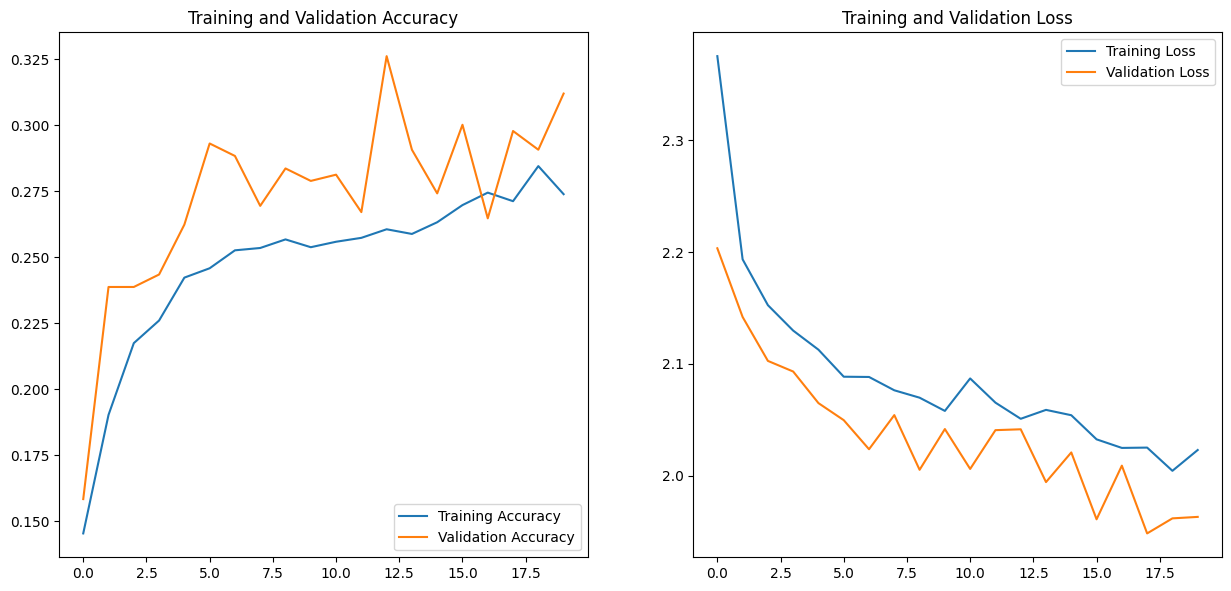

In [76]:
import matplotlib.pyplot as plt

# Assuming you trained with history_resnet
acc = history_resnet.history['accuracy']
val_acc = history_resnet.history['val_accuracy']
loss = history_resnet.history['loss']
val_loss = history_resnet.history['val_loss']

epochs_range = range(len(acc))  # Automatically adapts to number of epochs

plt.figure(figsize=(15, 15))

# Accuracy plot
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Loss plot
plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()


In [77]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

def predictor(model, test_gen):
    classes = list(test_gen.class_indices.keys())
    class_count = len(classes)

    # Get model predictions
    preds = model.predict(test_gen, verbose=1)
    test_count = len(preds)

    pred_indices = []
    errors = 0

    for i, p in enumerate(preds):
        pred_index = np.argmax(p)
        pred_indices.append(pred_index)
        true_index = test_gen.labels[i]

        if pred_index != true_index:
            errors += 1

    accuracy = (test_count - errors) * 100 / test_count

    ytrue = np.array(test_gen.labels, dtype="int")
    ypred = np.array(pred_indices, dtype="int")

    msg = f"There were {errors} errors in {test_count} tests for an accuracy of {accuracy:.2f}%"
    print(msg)

    # Confusion Matrix
    cm = confusion_matrix(ytrue, ypred)

    plt.figure(figsize=(10, 10))
    sns.heatmap(cm, annot=True, fmt='g', cmap="Blues", cbar=False)
    plt.xticks(np.arange(class_count) + 0.5, classes, rotation=90)
    plt.yticks(np.arange(class_count) + 0.5, classes, rotation=0)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

    # Classification Report
    clr = classification_report(ytrue, ypred, target_names=classes, digits=4)
    print("Classification Report:\n\n", clr)

    return


In [78]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array


In [79]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def get_model_prediction(model, image_path, labels, target_size=(255, 255)):
    # Load and preprocess the image
    img = load_img(image_path, target_size=target_size)
    x = img_to_array(img) / 255.0  # Normalize
    x = np.expand_dims(x, axis=0)  # Add batch dimension

    # Predict
    predictions = model.predict(x, verbose=0)
    predicted_index = np.argmax(predictions)

    # Return label
    return labels[predicted_index]


In [81]:
class_labels = list(test_gen.class_indices.keys())


In [83]:
pred = []

for file in test_df['path'].values:
    pred.append(get_model_prediction(final_model, file, class_labels))

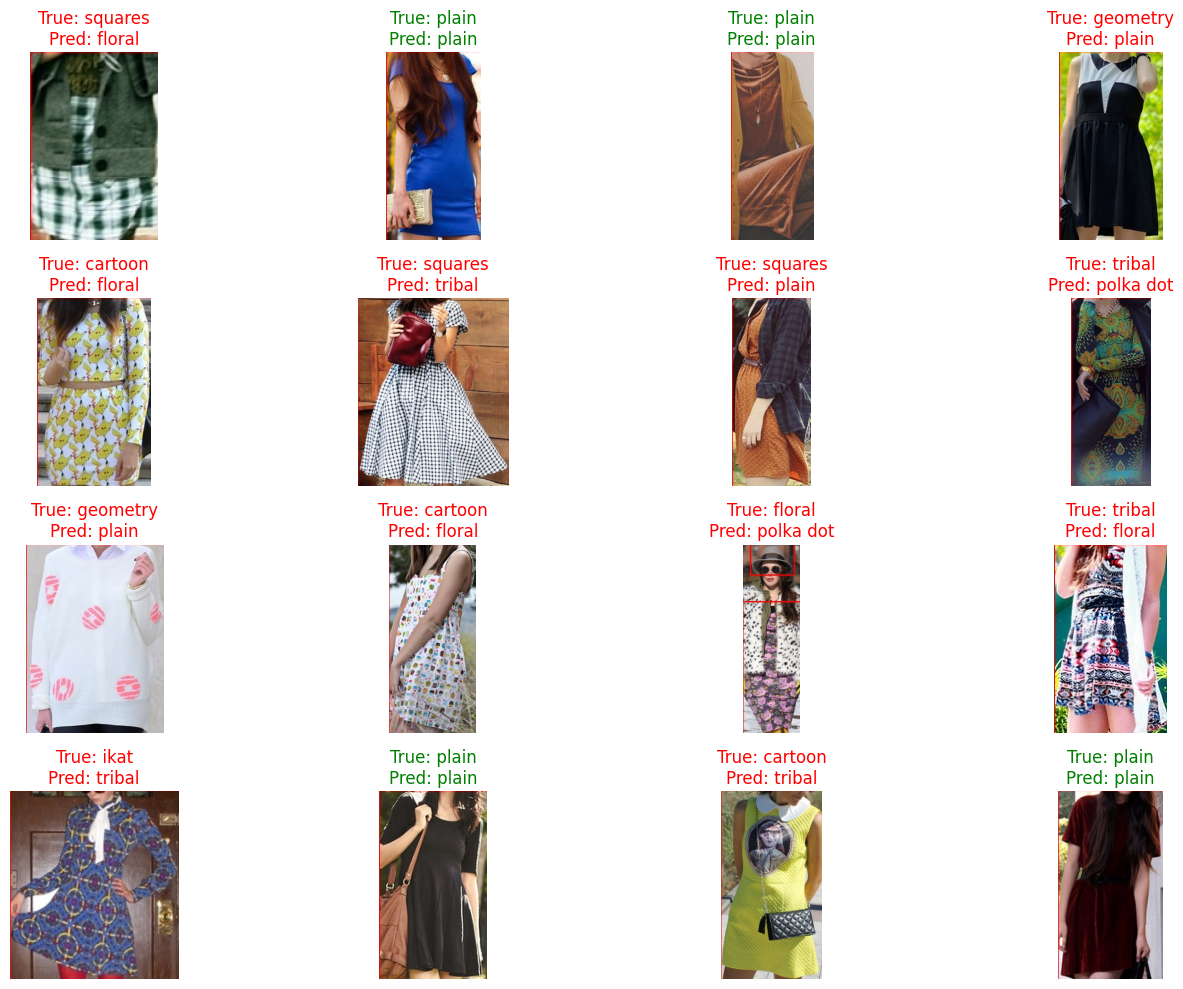

In [84]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img
import numpy as np

# Generate random indices
random_index = np.random.randint(0, len(test_df), 16)

# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 10))

for i, ax in enumerate(axes.ravel()):
    img_path = test_df['path'].iloc[random_index[i]]
    img = load_img(img_path)

    # Display image
    ax.imshow(img)
    ax.axis('off')

    true_label = test_df['label'].iloc[random_index[i]]
    predicted_label = pred[random_index[i]]

    # Set title color
    color = "green" if true_label == predicted_label else "red"

    # Display title with labels
    ax.set_title(f"True: {true_label}\nPred: {predicted_label}", color=color)

plt.tight_layout()
plt.show()


In [85]:
final_model.save("model_final.h5")